# **TK95348-Analysis and Prediction of Crime Hotspots using machine learning with Stacked Generalization Approach**

# **import libraries**

In [1]:
pip install pandas matplotlib seaborn



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install pandas



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# **Read The Dataset**

In [5]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
df = pd.read_excel("20230320020226crime_data_extended_entries.xlsx")

In [7]:
df.head()

,date,time_of_day,crime_type,location,latitude,longitude,victim_gender,victim_age,perpetrator_gender,perpetrator_age,weapon,injury,weather,temperature,previous_activity
0,2021-12-18,21:29:18,Assault,Whitefield,13.1206,77.5712,Female,62,Other,18,Gun,Major,Partly Cloudy,40,Fraud
1,2018-09-16,08:36:10,Forgery,Jayanagar,13.0680,77.5754,Male,56,Male,18,NaN,Fatal,Partly Cloudy,10,NaN
2,2018-06-02,04:27:36,Embezzlement,Koramangala,13.0788,77.6458,Other,18,Male,20,Gun,Fatal,Partly Cloudy,5,Robbery
3,2020-02-24,10:51:00,Robbery,Electronic City,12.8899,77.5503,Male,25,Male,25,Gun,Minor,Clear,25,Drug Offense
4,2018-06-02,08:01:24,Forgery,Indiranagar,13.0214,77.4496,Male,53,Other,63,Knife,NaN,Clear,20,Fraud


In [8]:
df.tail()

,date,time_of_day,crime_type,location,latitude,longitude,victim_gender,victim_age,perpetrator_gender,perpetrator_age,weapon,injury,weather,temperature,previous_activity
695,2018-02-14,08:29:36,Burglary,Marathahalli,13.0599,77.4443,Other,26,Other,47,NaN,NaN,Partly Cloudy,3,Fraud
696,2019-06-14,14:51:19,Theft,Marathahalli,12.8068,77.5564,Female,48,Male,33,NaN,Minor,Rain,5,NaN
697,2018-05-06,21:03:00,Forgery,Koramangala,12.8643,77.6427,Other,35,Female,64,Blunt Object,Major,Rain,33,Fraud
698,2019-09-01,05:44:25,Drug Offense,Electronic City,13.1407,77.7683,Other,36,Other,47,NaN,NaN,Clear,4,Robbery
699,2022-05-23,11:59:14,Vandalism,Banashankari,13.0282,77.6920,Male,19,Female,34,Knife,NaN,Partly Cloudy,16,Robbery


# **Information about data**

In [9]:
# shape of dataset
df.shape

(700, 15)

In [10]:
df["crime_type"].value_counts()

crime_type
Robbery         89
Embezzlement    82
Burglary        80
Vandalism       79
Theft           78
Assault         75
Forgery         75
Drug Offense    74
Fraud           68
Name: count, dtype: int64

In [11]:
# datatype of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                700 non-null    datetime64[ns]
 1   time_of_day         700 non-null    object        
 2   crime_type          700 non-null    object        
 3   location            700 non-null    object        
 4   latitude            700 non-null    float64       
 5   longitude           700 non-null    float64       
 6   victim_gender       700 non-null    object        
 7   victim_age          700 non-null    int64         
 8   perpetrator_gender  700 non-null    object        
 9   perpetrator_age     700 non-null    int64         
 10  weapon              528 non-null    object        
 11  injury              525 non-null    object        
 12  weather             700 non-null    object        
 13  temperature         700 non-null    int64         

In [12]:
# check the null value
df.isnull().sum()

date                    0
time_of_day             0
crime_type              0
location                0
latitude                0
longitude               0
victim_gender           0
victim_age              0
perpetrator_gender      0
perpetrator_age         0
weapon                172
injury                175
weather                 0
temperature             0
previous_activity      65
dtype: int64

In [13]:
# Check The Duplicate Vlue
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
695    False
696    False
697    False
698    False
699    False
Length: 700, dtype: bool

In [14]:
# Describe the Data
df.describe().T

,count,mean,min,25%,50%,75%,max,std
date,700,2020-06-13 17:53:49.714285824,2018-01-08 00:00:00,2019-03-10 00:00:00,2020-05-29 00:00:00,2021-09-09 12:00:00,2022-12-30 00:00:00,NaN
latitude,700.0,13.002605,12.8025,12.90695,13.0064,13.09755,13.1999,0.114179
longitude,700.0,77.60551,77.4015,77.508875,77.60835,77.7046,77.7992,0.115468
victim_age,700.0,41.372857,18.0,29.0,42.0,54.0,65.0,13.980964
perpetrator_age,700.0,41.318571,18.0,29.0,41.0,54.0,65.0,14.014603
temperature,700.0,19.611429,0.0,9.0,20.0,30.0,40.0,11.823833


<Axes: >

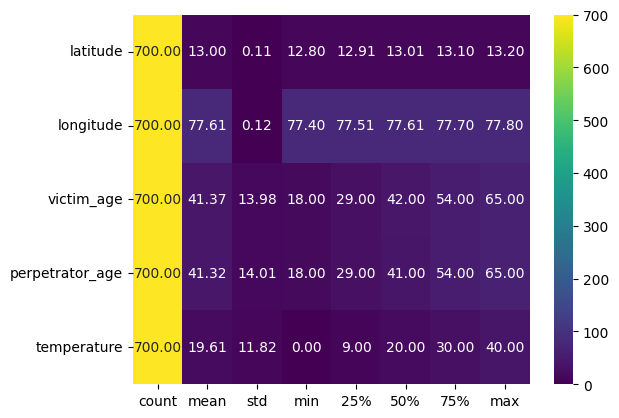

In [15]:
#sns.heatmap(df.describe().T)
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
summary_stats = numeric_df.describe().T  # Compute summary statistics for numeric columns
sns.heatmap(summary_stats, annot=True, cmap='viridis', fmt=".2f")  # Create heatmap

In [16]:
# Corrilation of Data
#df.corr()
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()


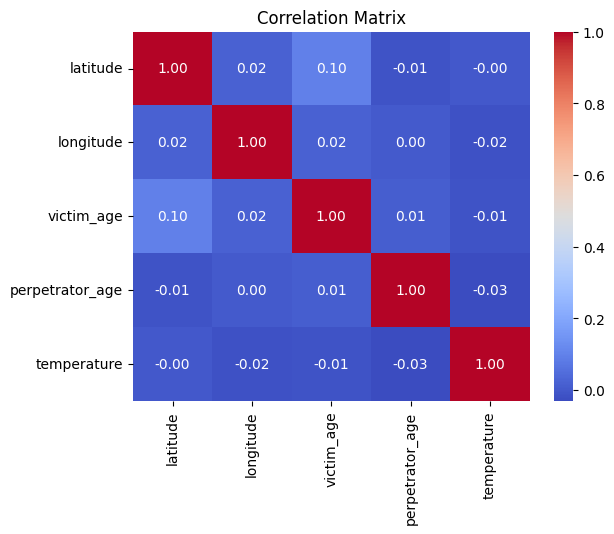

In [17]:
#sns.heatmap(df.corr())
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                700 non-null    datetime64[ns]
 1   time_of_day         700 non-null    object        
 2   crime_type          700 non-null    object        
 3   location            700 non-null    object        
 4   latitude            700 non-null    float64       
 5   longitude           700 non-null    float64       
 6   victim_gender       700 non-null    object        
 7   victim_age          700 non-null    int64         
 8   perpetrator_gender  700 non-null    object        
 9   perpetrator_age     700 non-null    int64         
 10  weapon              528 non-null    object        
 11  injury              525 non-null    object        
 12  weather             700 non-null    object        
 13  temperature         700 non-null    int64         

# **EDA**

## **Apply a Label Encoding**

In [19]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [21]:
# before applying LabelEncoding
df.head()

,date,time_of_day,crime_type,location,latitude,longitude,victim_gender,victim_age,perpetrator_gender,perpetrator_age,weapon,injury,weather,temperature,previous_activity
0,2021-12-18,21:29:18,Assault,Whitefield,13.1206,77.5712,Female,62,Other,18,Gun,Major,Partly Cloudy,40,Fraud
1,2018-09-16,08:36:10,Forgery,Jayanagar,13.0680,77.5754,Male,56,Male,18,NaN,Fatal,Partly Cloudy,10,NaN
2,2018-06-02,04:27:36,Embezzlement,Koramangala,13.0788,77.6458,Other,18,Male,20,Gun,Fatal,Partly Cloudy,5,Robbery
3,2020-02-24,10:51:00,Robbery,Electronic City,12.8899,77.5503,Male,25,Male,25,Gun,Minor,Clear,25,Drug Offense
4,2018-06-02,08:01:24,Forgery,Indiranagar,13.0214,77.4496,Male,53,Other,63,Knife,NaN,Clear,20,Fraud


In [22]:
col = df[["time_of_day",'crime_type','location','victim_gender','perpetrator_gender','weapon','injury','weather','previous_activity']]

In [23]:
for i in col:
    df[i]=le.fit_transform(df[i])

In [24]:
# After applying LabelEncoding
df.head()

,date,time_of_day,crime_type,location,latitude,longitude,victim_gender,victim_age,perpetrator_gender,perpetrator_age,weapon,injury,weather,temperature,previous_activity
0,2021-12-18,627,0,10,13.1206,77.5712,0,62,2,18,1,1,2,40,5
1,2018-09-16,243,4,6,13.0680,77.5754,1,56,1,18,3,0,2,10,9
2,2018-06-02,128,3,8,13.0788,77.6458,2,18,1,20,1,0,2,5,6
3,2020-02-24,298,6,2,12.8899,77.5503,1,25,1,25,1,2,0,25,2
4,2018-06-02,223,4,4,13.0214,77.4496,1,53,2,63,2,3,0,20,5


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                700 non-null    datetime64[ns]
 1   time_of_day         700 non-null    int32         
 2   crime_type          700 non-null    int32         
 3   location            700 non-null    int32         
 4   latitude            700 non-null    float64       
 5   longitude           700 non-null    float64       
 6   victim_gender       700 non-null    int32         
 7   victim_age          700 non-null    int64         
 8   perpetrator_gender  700 non-null    int32         
 9   perpetrator_age     700 non-null    int64         
 10  weapon              700 non-null    int32         
 11  injury              700 non-null    int32         
 12  weather             700 non-null    int32         
 13  temperature         700 non-null    int64         

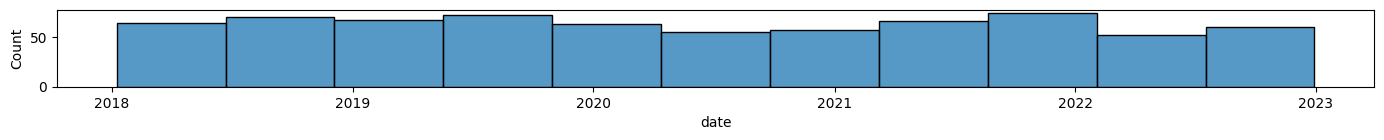

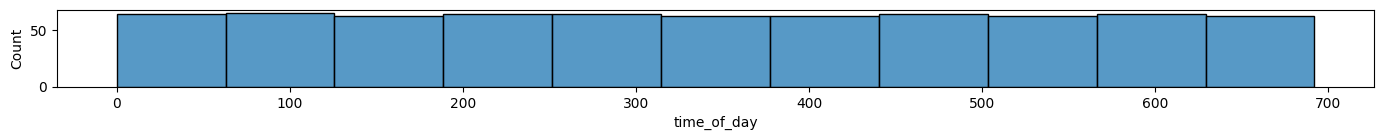

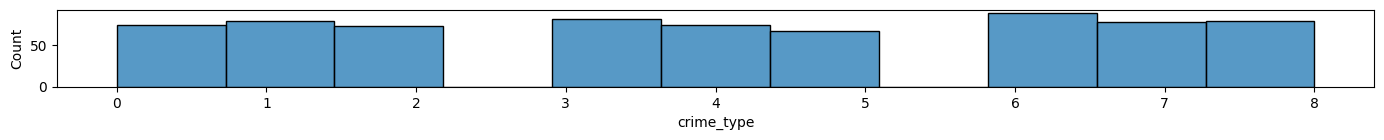

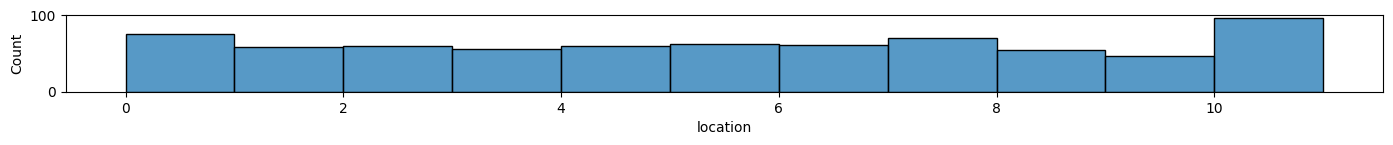

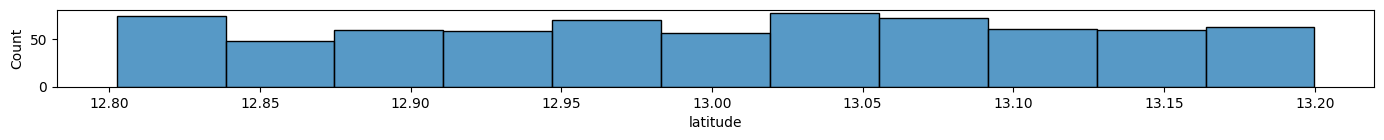

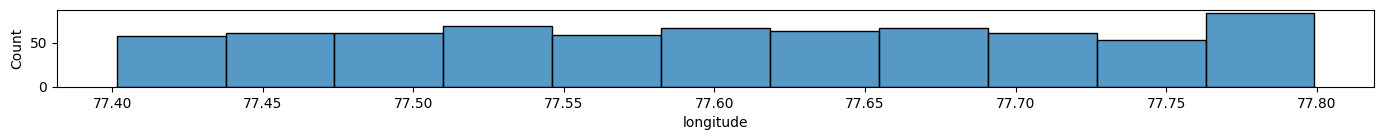

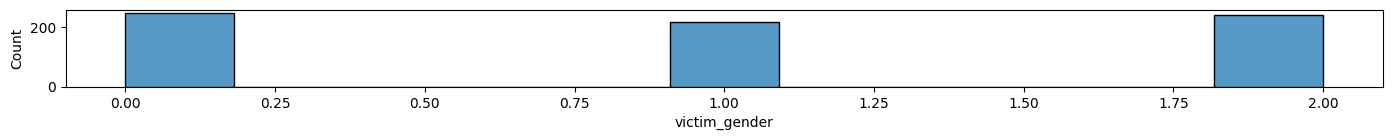

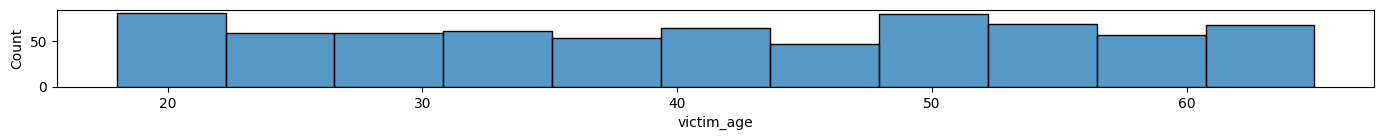

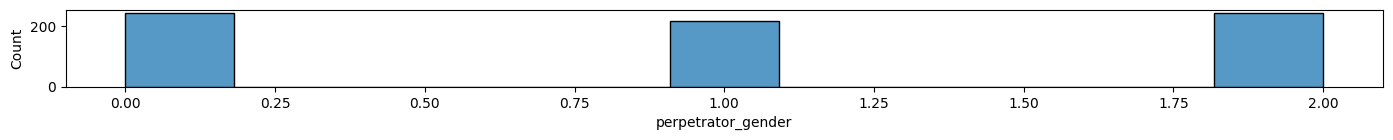

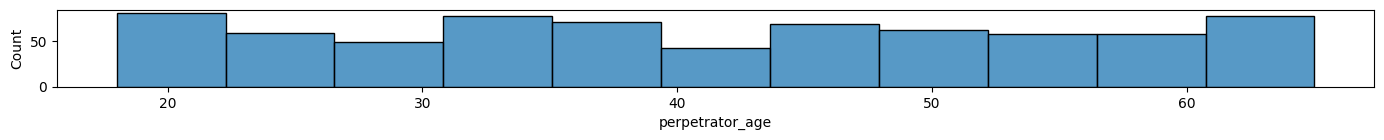

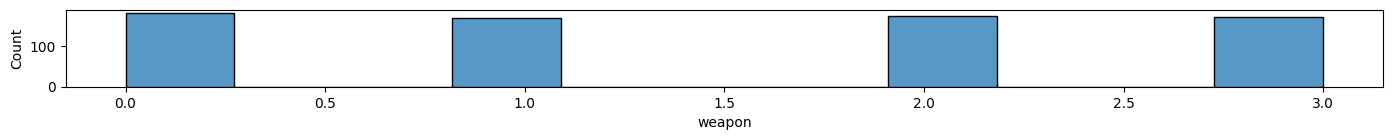

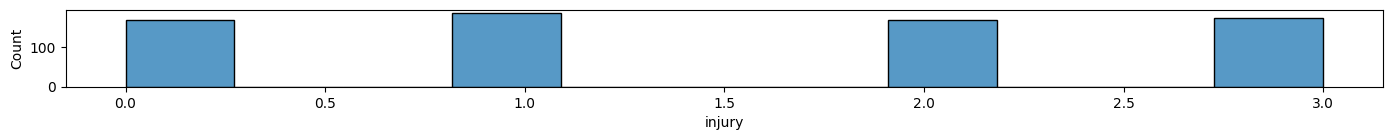

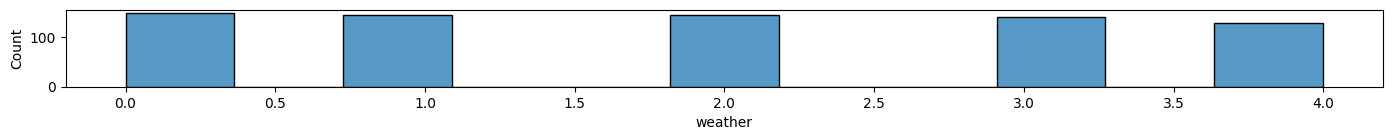

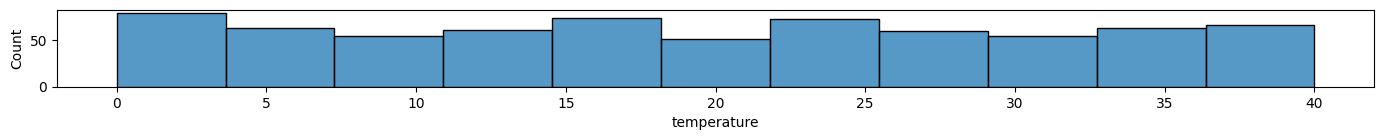

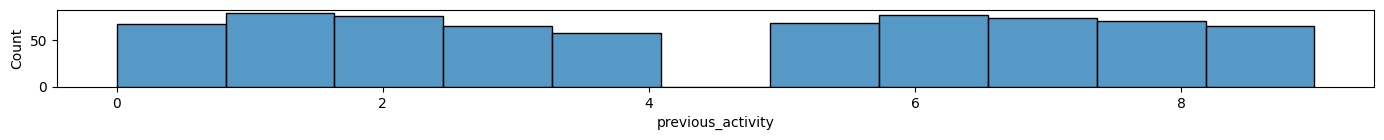

In [26]:
# Histplot of every column in dataset
df1=df.select_dtypes(exclude=['object','bool'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.histplot(data=df1, x=column)
plt.show()

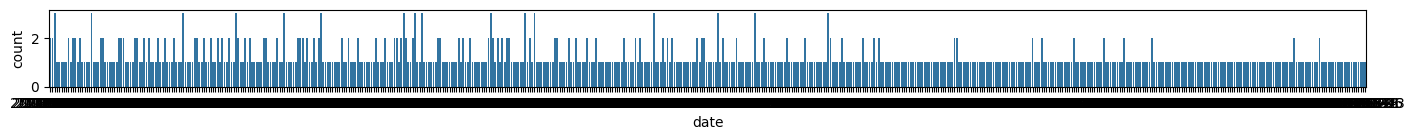

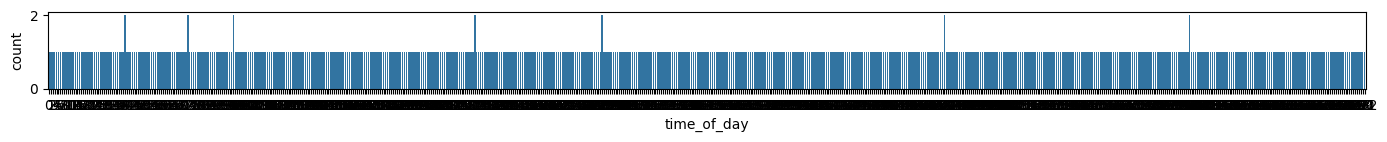

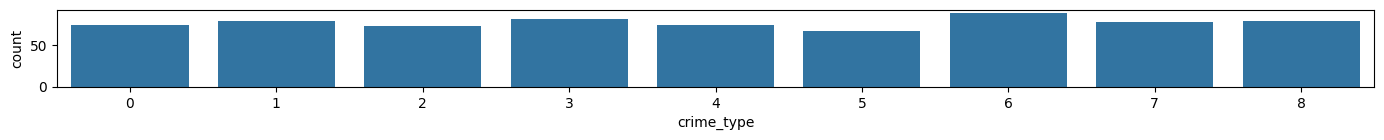

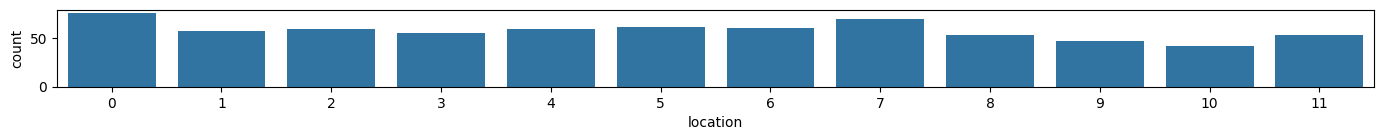

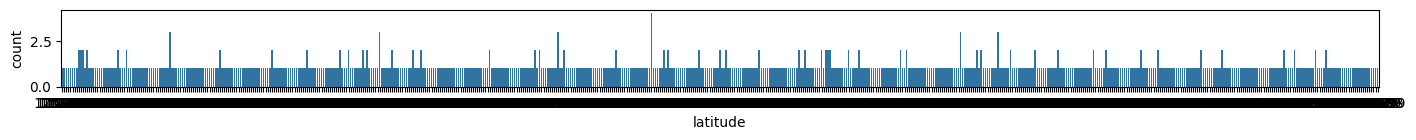

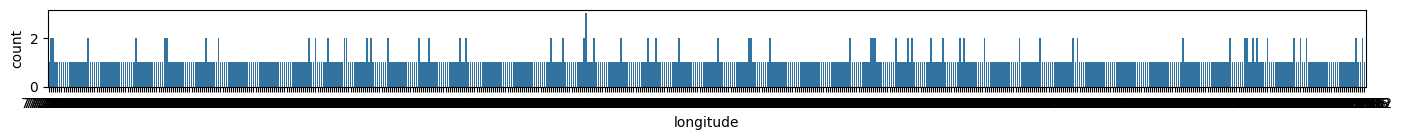

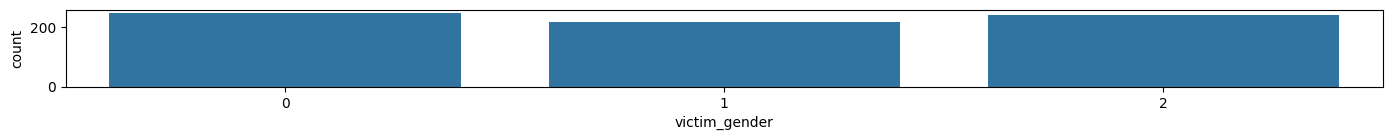

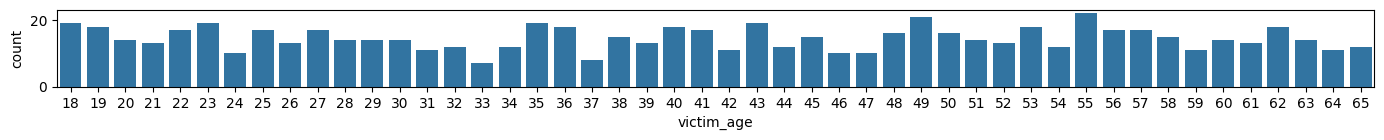

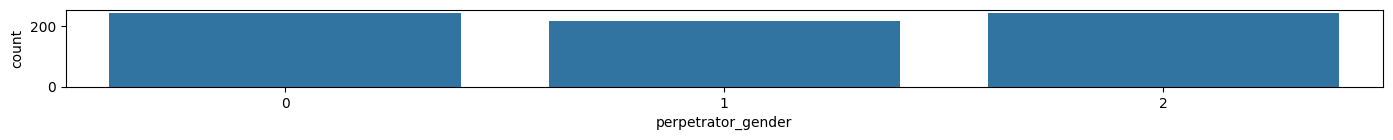

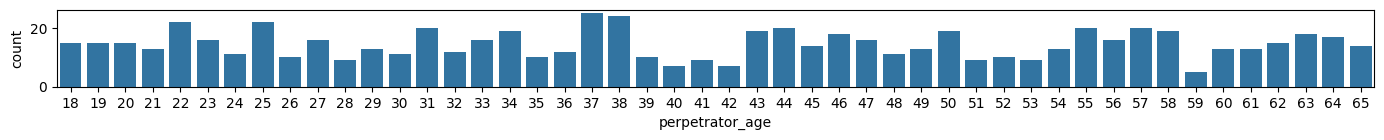

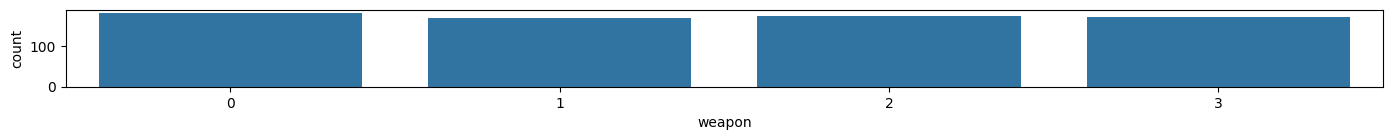

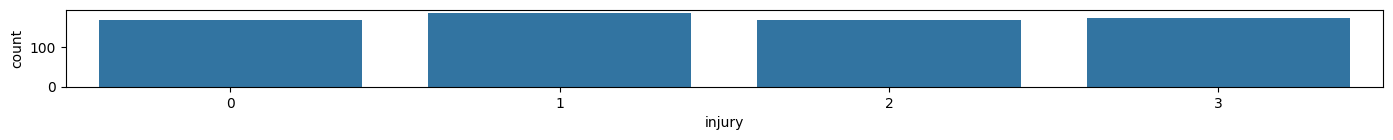

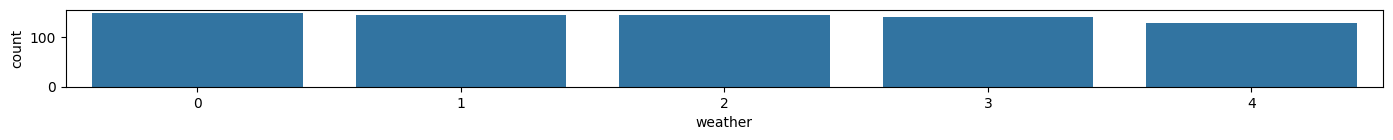

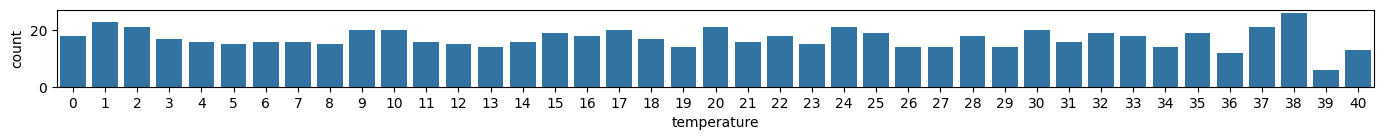

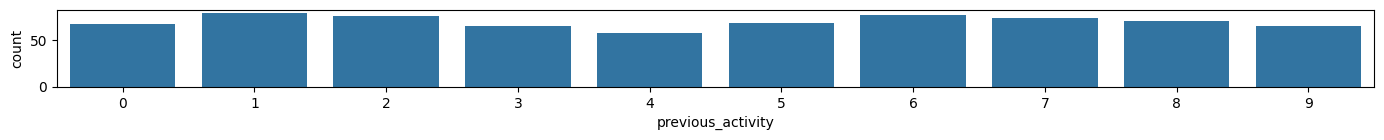

In [27]:
# countplot of every column in dataset
df1=df.select_dtypes(exclude=['object','bool'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.countplot(data=df1, x=column)
plt.show()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                700 non-null    datetime64[ns]
 1   time_of_day         700 non-null    int32         
 2   crime_type          700 non-null    int32         
 3   location            700 non-null    int32         
 4   latitude            700 non-null    float64       
 5   longitude           700 non-null    float64       
 6   victim_gender       700 non-null    int32         
 7   victim_age          700 non-null    int64         
 8   perpetrator_gender  700 non-null    int32         
 9   perpetrator_age     700 non-null    int64         
 10  weapon              700 non-null    int32         
 11  injury              700 non-null    int32         
 12  weather             700 non-null    int32         
 13  temperature         700 non-null    int64         

<Axes: ylabel='crime_type'>

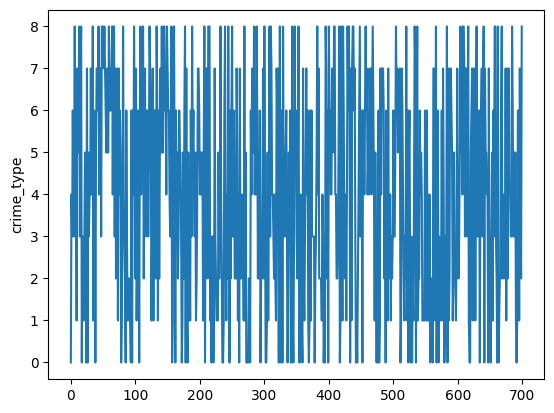

In [29]:
# Target column lineplot
sns.lineplot(df["crime_type"])

<Axes: ylabel='crime_type'>

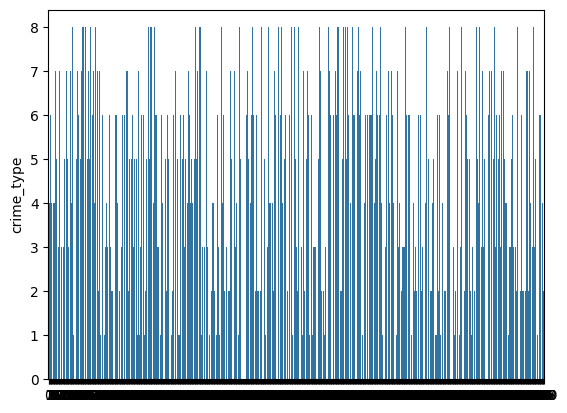

In [30]:
# Target column lineplot
sns.barplot(df["crime_type"])

<Axes: xlabel='crime_type', ylabel='Count'>

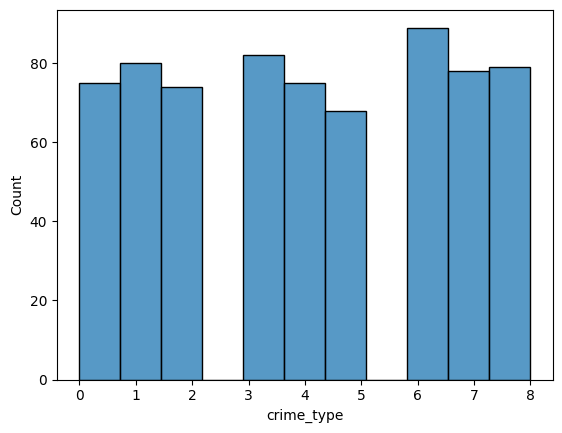

In [31]:
# Target column lineplot
sns.histplot(df["crime_type"])

<Axes: xlabel='crime_type', ylabel='Density'>

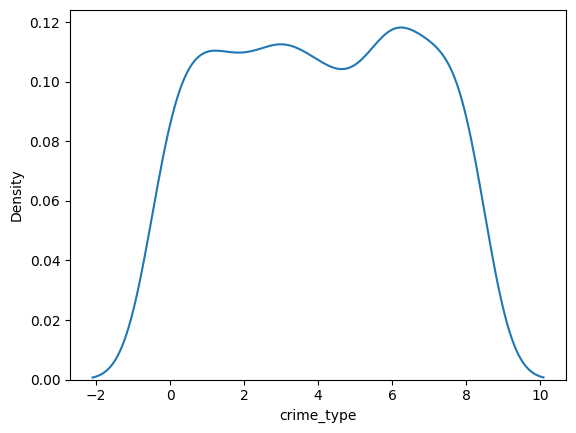

In [32]:
# target column kdeplot
sns.kdeplot(df["crime_type"])

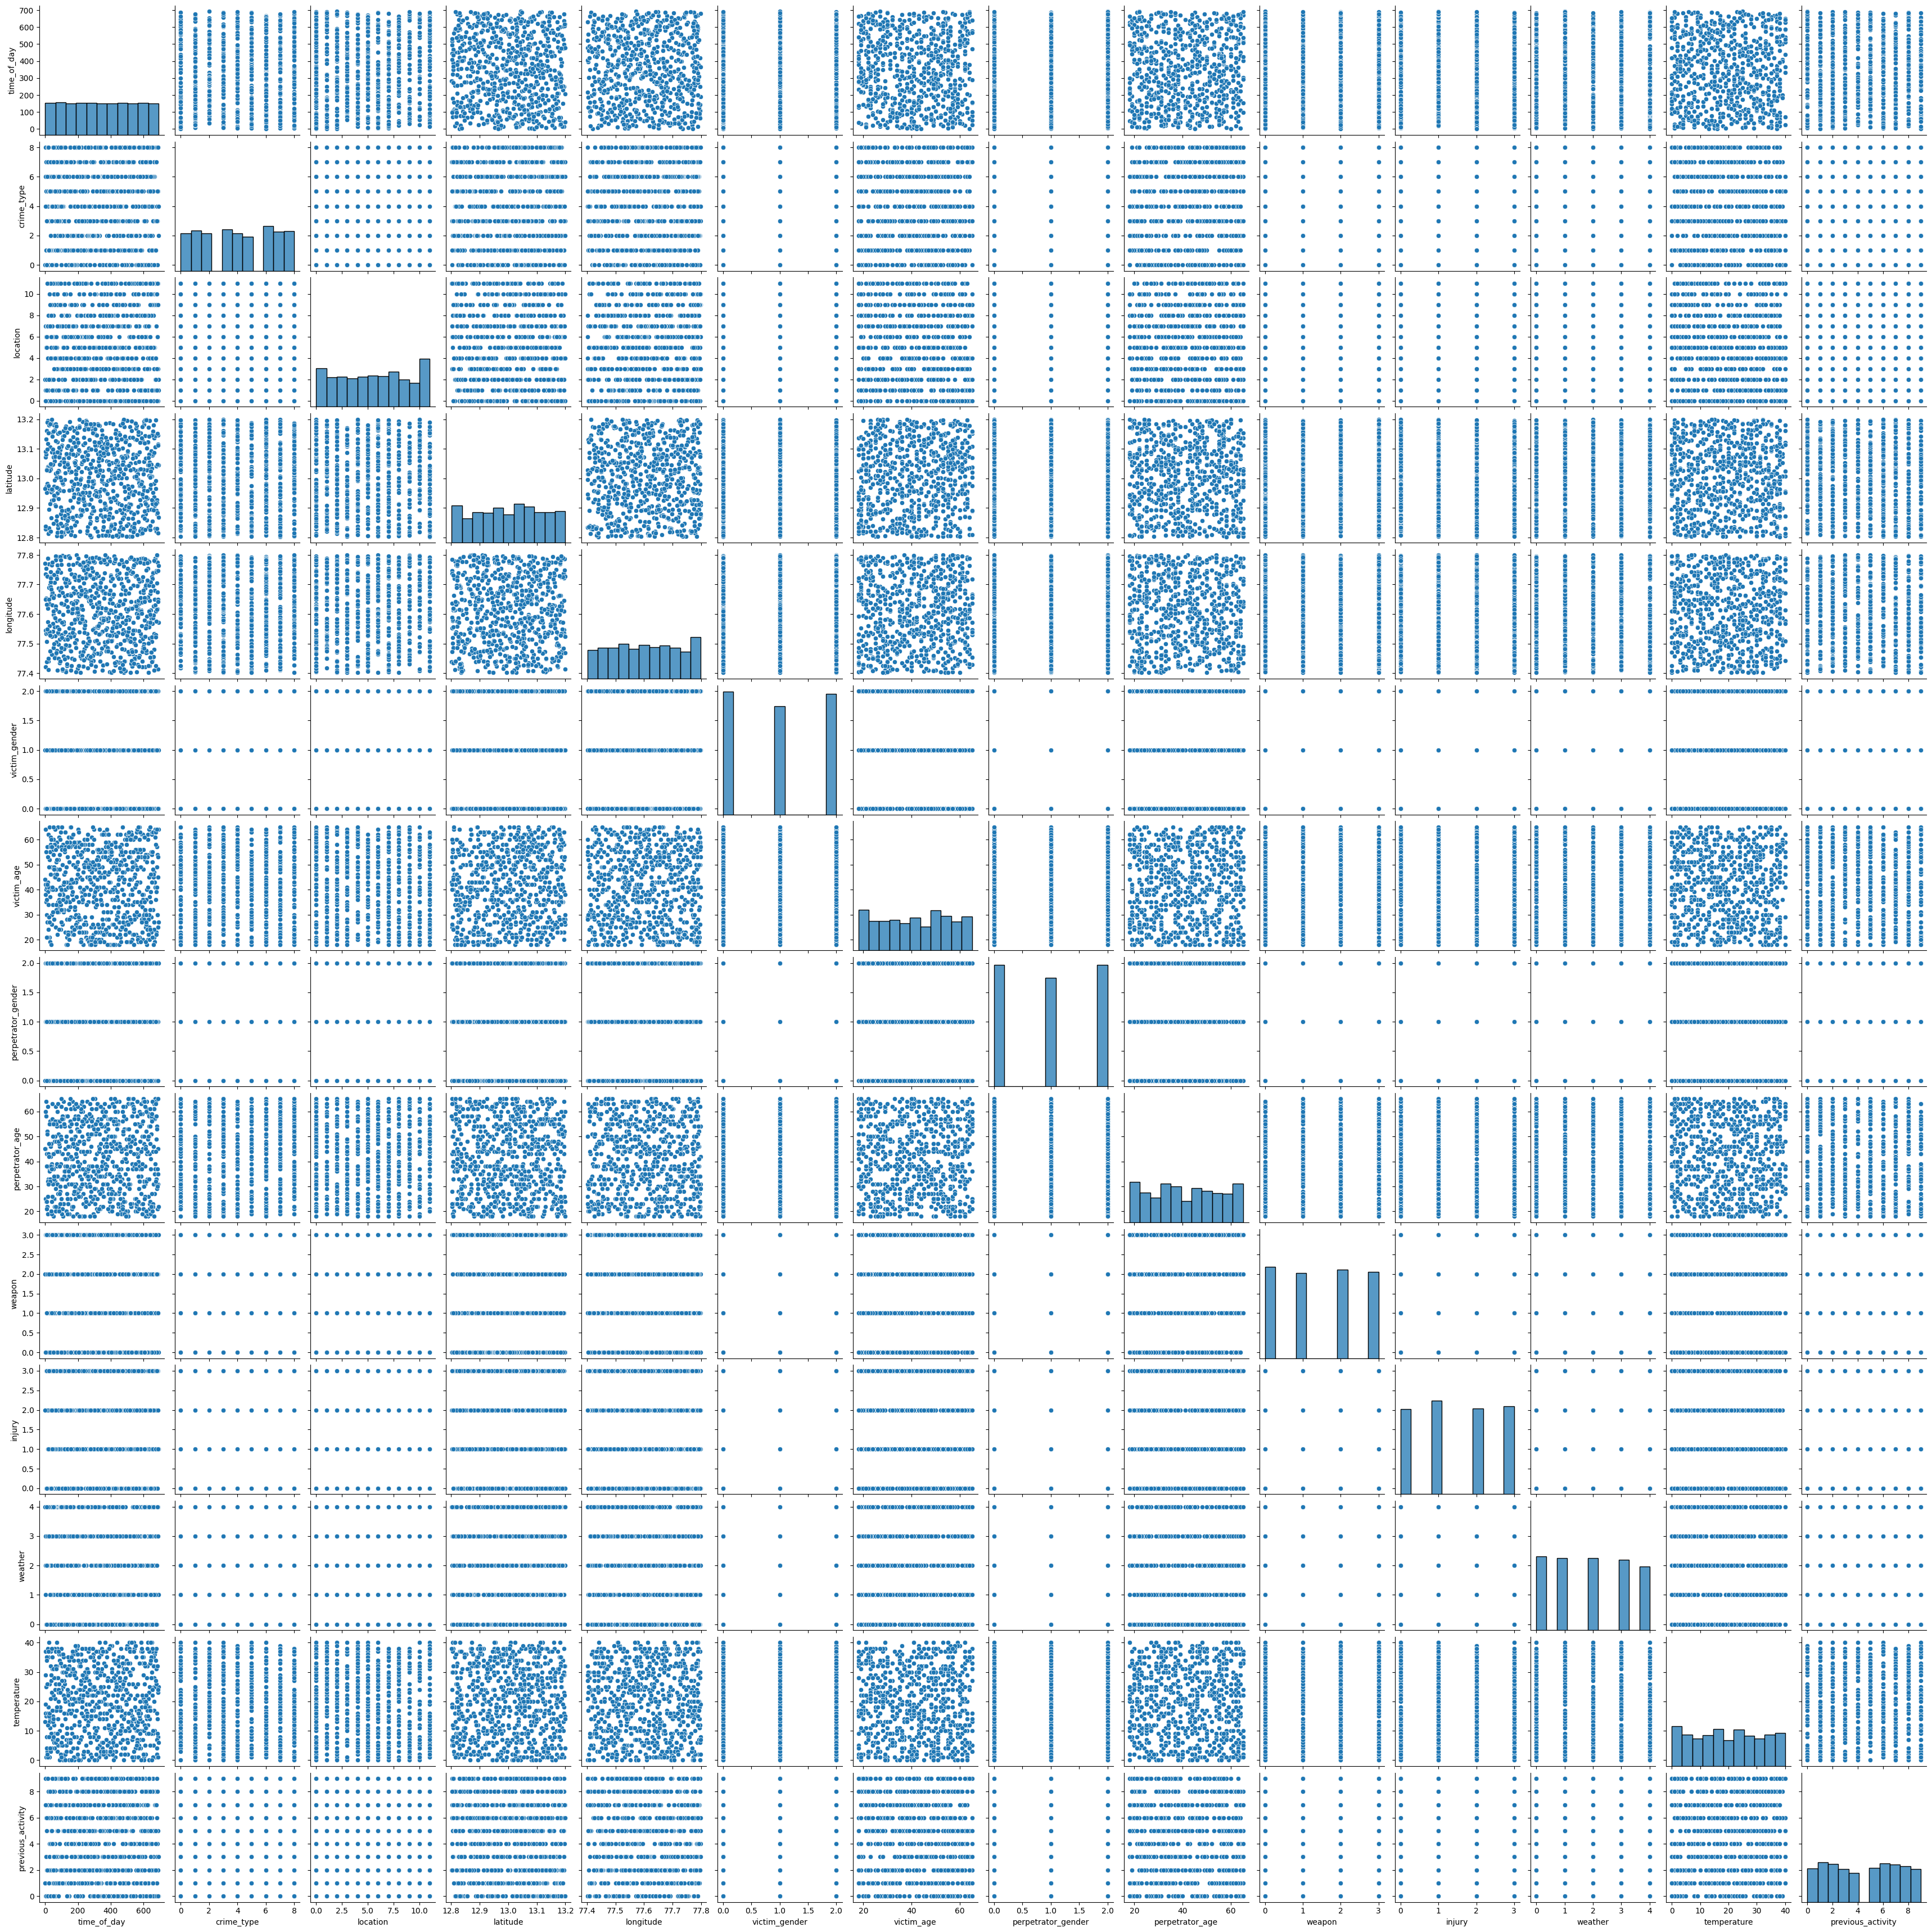

In [33]:
# pairplot of every column in dataset
sns.pairplot(df)

# **Preprocessing**

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                700 non-null    datetime64[ns]
 1   time_of_day         700 non-null    int32         
 2   crime_type          700 non-null    int32         
 3   location            700 non-null    int32         
 4   latitude            700 non-null    float64       
 5   longitude           700 non-null    float64       
 6   victim_gender       700 non-null    int32         
 7   victim_age          700 non-null    int64         
 8   perpetrator_gender  700 non-null    int32         
 9   perpetrator_age     700 non-null    int64         
 10  weapon              700 non-null    int32         
 11  injury              700 non-null    int32         
 12  weather             700 non-null    int32         
 13  temperature         700 non-null    int64         

In [35]:
df.isnull().sum()

date                  0
time_of_day           0
crime_type            0
location              0
latitude              0
longitude             0
victim_gender         0
victim_age            0
perpetrator_gender    0
perpetrator_age       0
weapon                0
injury                0
weather               0
temperature           0
previous_activity     0
dtype: int64

In [36]:
df.isnull().sum().sum()

0

In [37]:
#Delete a unknown column
df.drop("date",axis=1,inplace=True)
df.drop("time_of_day",axis=1,inplace=True)

In [38]:
df["crime_type"].value_counts()

crime_type
6    89
3    82
1    80
8    79
7    78
0    75
4    75
2    74
5    68
Name: count, dtype: int64

## **Split The Data**

### **Applying the Smote Methos**

In [39]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
from imblearn.over_sampling import RandomOverSampler

In [41]:
x = df.drop(['crime_type'], axis = 1) 
y = df['crime_type']

In [42]:
Oversample = RandomOverSampler(random_state=72)
x_sm, y_sm = Oversample.fit_resample(x[:100],y[:100])

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size = 0.3, random_state= 72) 

In [45]:
x_train.shape

(94, 12)

In [46]:
x_test.shape

(41, 12)

In [47]:
y_train.shape

(94,)

# **Module Train**

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   crime_type          700 non-null    int32  
 1   location            700 non-null    int32  
 2   latitude            700 non-null    float64
 3   longitude           700 non-null    float64
 4   victim_gender       700 non-null    int32  
 5   victim_age          700 non-null    int64  
 6   perpetrator_gender  700 non-null    int32  
 7   perpetrator_age     700 non-null    int64  
 8   weapon              700 non-null    int32  
 9   injury              700 non-null    int32  
 10  weather             700 non-null    int32  
 11  temperature         700 non-null    int64  
 12  previous_activity   700 non-null    int32  
dtypes: float64(2), int32(8), int64(3)
memory usage: 49.3 KB


## **RendomForestClasifier**

In [50]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [51]:
k = 5
kf = KFold(n_splits=k, shuffle=True)

In [52]:
from sklearn.ensemble import RandomForestClassifier
re = RandomForestClassifier(random_state=72)
re.fit(x_train,y_train)
re_pred = re.predict(x_test)
ac = accuracy_score(y_test,re_pred)
ac

0.4878048780487805

## **DecisionTreeClasifier**

In [53]:
from sklearn.tree import DecisionTreeClassifier
de = DecisionTreeClassifier()
de.fit(x_train,y_train)
de_pred = de.predict(x_test)
ac1 = accuracy_score(y_test,de_pred)
ac1

0.43902439024390244

## **GradientBoostingClassifier**

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
gd = GradientBoostingClassifier()
gd.fit(x_train,y_train)
gd_pred = gd.predict(x_test)
bc = accuracy_score(y_test,gd_pred)
bc

0.4634146341463415

# **Prediction**

In [55]:
df.head()

,crime_type,location,latitude,longitude,victim_gender,victim_age,perpetrator_gender,perpetrator_age,weapon,injury,weather,temperature,previous_activity
0,0,10,13.1206,77.5712,0,62,2,18,1,1,2,40,5
1,4,6,13.0680,77.5754,1,56,1,18,3,0,2,10,9
2,3,8,13.0788,77.6458,2,18,1,20,1,0,2,5,6
3,6,2,12.8899,77.5503,1,25,1,25,1,2,0,25,2
4,4,4,13.0214,77.4496,1,53,2,63,2,3,0,20,5


In [56]:
input = [[10	,13.1206,	77.5712,	0	,62,	2	,18	,1	,1,	2,	40,	5]]

In [57]:
input1 = [[8	,13.0788	,77.6458,	2	,18	,1,	20,	1	,0	,2,	5	,7]]

In [58]:
out = gd.predict(input)

c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [59]:
out1 = gd.predict(input1)

c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [60]:
out1

array([3])

In [61]:
if out == 0:
    print('Robbery')
elif out == 1:
    print('Embezzlement')
elif out == 2:
    print('Burglary')
elif out == 3:
    print('Vandalism')
elif out == 4:
    print('Theft')
elif out == 5:
    print('Assault')
elif out == 6:
    print('Forgery')
elif out == 7:
    print('Drug Offense')
else:
    print('Fraud')

Robbery


In [62]:
if out1 == 0:
    print('Robbery')
elif out1 == 1:
    print('Embezzlement')
elif out1 == 2:
    print('Burglary')
elif out1 == 3:
    print('Vandalism')
elif out1 == 4:
    print('Theft')
elif out1 == 5:
    print('Assault')
elif out1 == 6:
    print('Forgery')
elif out1 == 7:
    print('Drug Offense')
else:
    print('Fraud')

Vandalism


In [63]:
pip install folium



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [64]:
import folium

# Bangalore latitude and longitude
lat, lon = 13.1206, 77.5715

# Create a map centered on Bangalore
map_bangalore = folium.Map(location=[lat, lon], zoom_start=13)

# Add a marker for Bangalore
folium.Marker([lat, lon], tooltip='Bangalore').add_to(map_bangalore)

# Display the map
m = map_bangalore

In [65]:
m

# **Accuracy Graph**

In [66]:
graph = pd.DataFrame({'Modules':['RendomForestClasifier','DecisionTreeClassifier','GradientBoostingClassifier'],
          'Accuracy':[ac*100,ac1*100,bc*100]})

In [67]:
graph

,Modules,Accuracy
0,RendomForestClasifier,48.780488
1,DecisionTreeClassifier,43.902439
2,GradientBoostingClassifier,46.341463


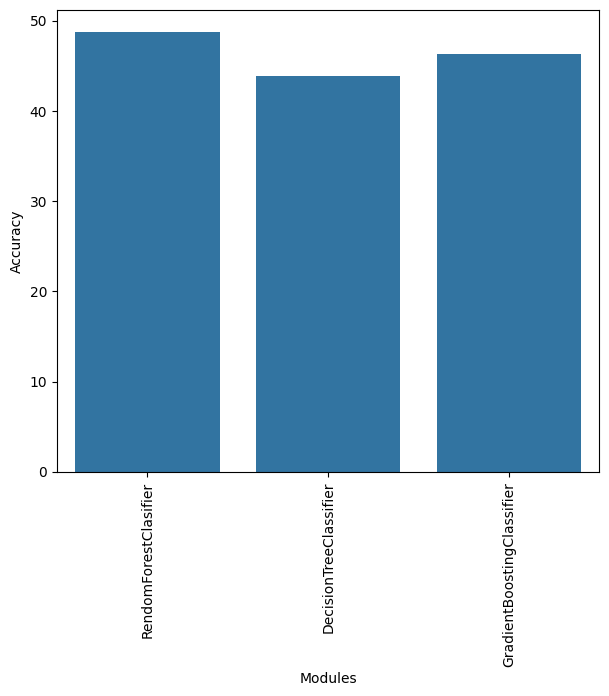

In [68]:
plt.figure(figsize=(7,6))
sns.barplot(y=graph.Accuracy,x=graph.Modules)
plt.xticks(rotation='vertical')
plt.show()